# 梯度下降實作

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. 先從$f(x) = x^2 + 2x + 1$開始，嘗試以梯度下降找出最佳解

In [2]:
# 定義好方程式
def f(x):
    return x ** 2 + 2 * x + 1

f(2)

9

In [3]:
# 手算方程式的導函數
# -> f'(x) = 2 * x + 2
# -> 極值會出現在 x = -1 的地方

Text(0, 0.5, 'f(x)')

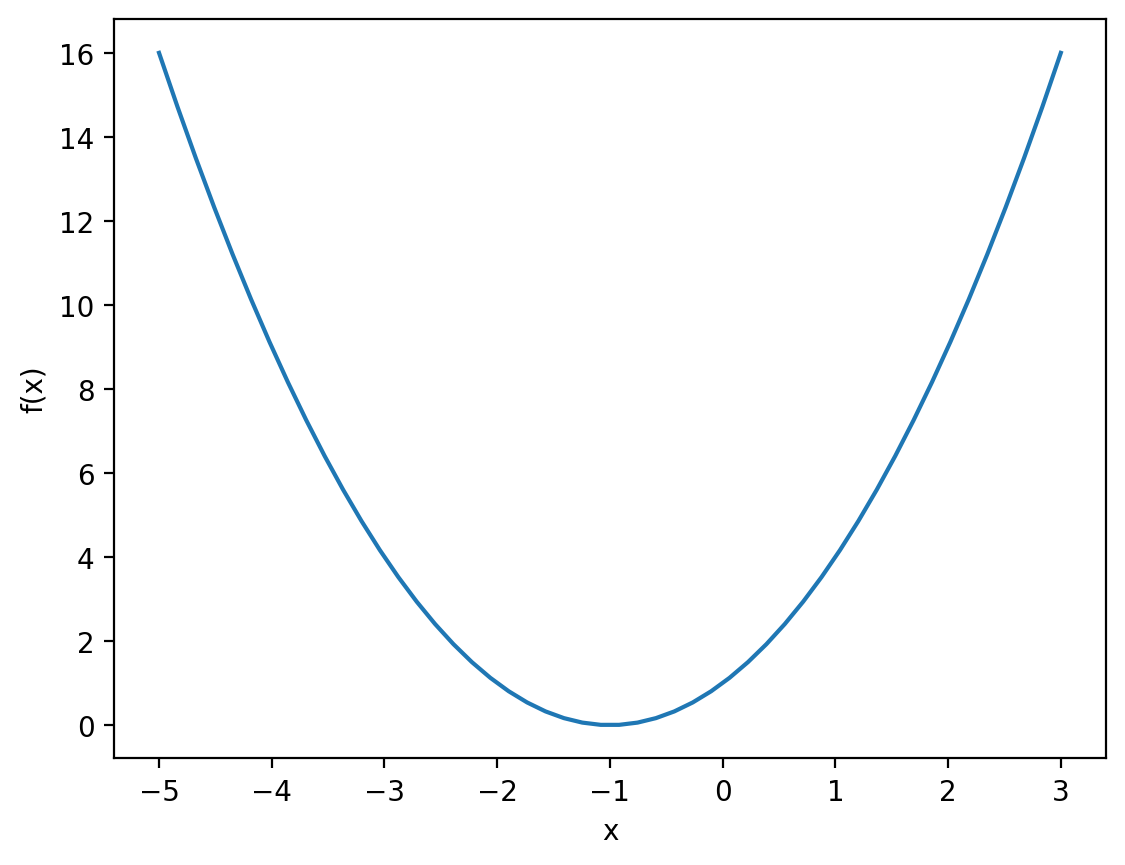

In [4]:
# 畫出方程式的圖
xx = np.linspace(-5, 3)
plt.plot(xx, f(xx))
plt.xlabel(f'x')
plt.ylabel('f(x)')

梯度下降的更新方式為：
$x \leftarrow x - \eta \nabla{f}$

In [43]:
x = 6  # 隨機初始值
eta = 0.3  # 學習率 = 0.1，也可自訂

for iteration in range(10):  # 參數要更新幾次
    grad = 2 * (x + 1)  # 微分結果
    x = x - eta * grad  # 參數更新公式（可參考課程投影片），梯度（grad）的算法大家自己打
    
    print(iteration + 1, x)

# 最佳 x = -1

1 1.7999999999999998
2 0.11999999999999988
3 -0.552
4 -0.8208
5 -0.92832
6 -0.971328
7 -0.9885311999999999
8 -0.9954124799999999
9 -0.998164992
10 -0.9992659968


### 數學原理
1. 原函數：$f(x) = x^2 + 2x + 1 = (x + 1)^2$
2. 導函數：$f'(x) = 2x + 2 = 2(x + 1)$
3. 理論最佳解：$x = -1$（導數為零的點）
   
### 執行結果預測
從 $x = 6$ 開始，學習率 $\eta = 0.2$：

- 第1次：$x = 6 - 0.2 \times 2(6+1) = 6 - 2.8 = 3.2$
- 第2次：$x = 3.2 - 0.2 \times 2(3.2+1) = 3.2 - 1.68 = 1.52$
- 第3次：$x = 1.52 - 0.2 \times 2(1.52+1) = 1.52 - 1.008 = 0.512$
程式會逐步收斂到 $x = -1$。

### 關鍵概念
- 學習率 ($\eta$)：控制每次更新的步長
- 梯度 (grad)：函數的斜率，指向函數增長最快的方向
- 更新公式：$x \leftarrow x - \eta \nabla f(x)$（往梯度相反方向移動）
這是深度學習中參數優化的基礎概念！

## 2. 進一步推廣到更多次方：$f(x) = 7 x^4 + 7 x^3 -14 x^2 + 8x -5$

`n_iteration` = 400

`learning_rate` = 0.001

`x0` = 2

In [6]:
# 先繪出方程式的樣貌
def f(x):
    return 7 * x ** 4 + 7 * x ** 3 - 14 * x ** 2 + 8 * x - 5

f(1)

3

這個 GradientDescent 類別實作了四次多項式函數的梯度下降演算法

In [ ]:
class GradientDescent():
    def __init__(self, coefs, n_iteration, learning_rate):
        self.n_iteration = n_iteration  # 更新次數
        self.lr = learning_rate  # 學習率
        
        # 儲存多項式係數 (w0 + w1*x + w2*x² + w3*x³ + w4*x⁴)
        self.w0 = coefs[0]  # 常數項
        self.w1 = coefs[1]  # x 的係數
        self.w2 = coefs[2]  # x² 的係數
        self.w3 = coefs[3]  # x³ 的係數
        self.w4 = coefs[4]  # x⁴ 的係數
        
    def loss_function(self, x):
        # 計算四次多項式的值
        return self.w4 * x ** 4 + self.w3 * x ** 3 + self.w2 * x ** 2 + self.w1 * x + self.w0

    def derivative(self, x):
        # 四次多項式的導數
        return 4 * self.w4 * x ** 3 + 3 * self.w3 * x ** 2 + 2 * self.w2 * x + self.w1
    
    def gradient_descent(self, x0):
        x = x0  # 初始值
        y = self.loss_function(x)
        self.x_history = [x]  # 記錄 x 的變化
        self.y_history = [y]  # 記錄 f(x) 的變化
        
        for i_iter in range(self.n_iteration):
            x = x - self.lr * self.derivative(x) # 梯度下降更新
            y = self.loss_function(x)
            # ...記錄歷史和輸出進度
            
            if i_iter % 10 == 9:
                print(f"Iteration {i_iter + 1}: f({x:.3f}) = {y:.4f}, f'({x:.3f}) = {self.derivative(x):.4f}")
            
            self.x_history.append(x)
            self.y_history.append(y)
            
        return x, y, self.x_history, self.y_history
    
    def plot_gd_history(self, x_min, x_max):
        xx = np.arange(x_min, x_max + 0.1, 0.1)
        yy = self.loss_function(xx)
        
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.plot(xx, yy, color='k', ls='-', lw=1)
        ax.scatter(self.x_history, self.y_history, marker='o', s=30, c='b')
        
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$f(x)$')
        ax.set_xlim([x_min - 0.1, x_max + 0.1])
        
    def save_gif(self, x_min, x_max, filename):
        xx = np.arange(x_min, x_max + 0.1, 0.1)
        yy = self.loss_function(xx)
        
        fig = plt.figure(figsize=(6, 4))
        ax = fig.gca()

        line, = ax.plot(xx, yy, color='k', ls='-', lw=1)
        dot, = ax.plot([], [], marker='o', markersize=8, c='b', linestyle='')
        
        plt.xlabel(r'$x$')
        plt.ylabel(r'$f(x)$')
        ax.set_xlim([x_min - 0.1, x_max + 0.1])
        
        def update(idx):
            dot.set_data([self.x_history[idx]], [self.y_history[idx]])
            plt.title(f'Iteration {idx:>3d}', fontname = 'monospace')
            return dot

        def init():
            line.set_data(xx, yy)
            return line

        anim = animation.FuncAnimation(
            fig, 
            func=update, 
            frames=len(self.x_history), 
            init_func=init, 
            interval=20, 
            repeat=True
        )

        anim.save(filename)

### 主要功能
1. 多項式優化：處理複雜的四次函數 $f(x) = 7x^4 + 7x^3 - 14x^2 + 8x - 5$
2. 歷史記錄：追蹤每次迭代的 x 和 f(x) 值
3. 視覺化：提供繪圖和動畫功能
4. 進度監控：每 10 次迭代輸出一次結果

Iteration 10: f(1.031) = 3.9339, f'(1.031) = 32.0965
Iteration 20: f(0.811) = -0.9568, f'(0.811) = 14.0451
Iteration 30: f(0.701) = -2.1733, f'(0.701) = 8.3198
Iteration 40: f(0.631) = -2.6603, f'(0.631) = 5.7144
Iteration 50: f(0.580) = -2.9098, f'(0.580) = 4.2982
Iteration 60: f(0.542) = -3.0594, f'(0.542) = 3.4439
Iteration 70: f(0.510) = -3.1597, f'(0.510) = 2.8940
Iteration 80: f(0.483) = -3.2331, f'(0.483) = 2.5263
Iteration 90: f(0.459) = -3.2908, f'(0.459) = 2.2766
Iteration 100: f(0.437) = -3.3388, f'(0.437) = 2.1089
Iteration 110: f(0.416) = -3.3810, f'(0.416) = 2.0023
Iteration 120: f(0.396) = -3.4199, f'(0.396) = 1.9446
Iteration 130: f(0.377) = -3.4573, f'(0.377) = 1.9290
Iteration 140: f(0.358) = -3.4948, f'(0.358) = 1.9529
Iteration 150: f(0.338) = -3.5340, f'(0.338) = 2.0168
Iteration 160: f(0.317) = -3.5766, f'(0.317) = 2.1245
Iteration 170: f(0.295) = -3.6248, f'(0.295) = 2.2834
Iteration 180: f(0.272) = -3.6816, f'(0.272) = 2.5055
Iteration 190: f(0.245) = -3.7515, f

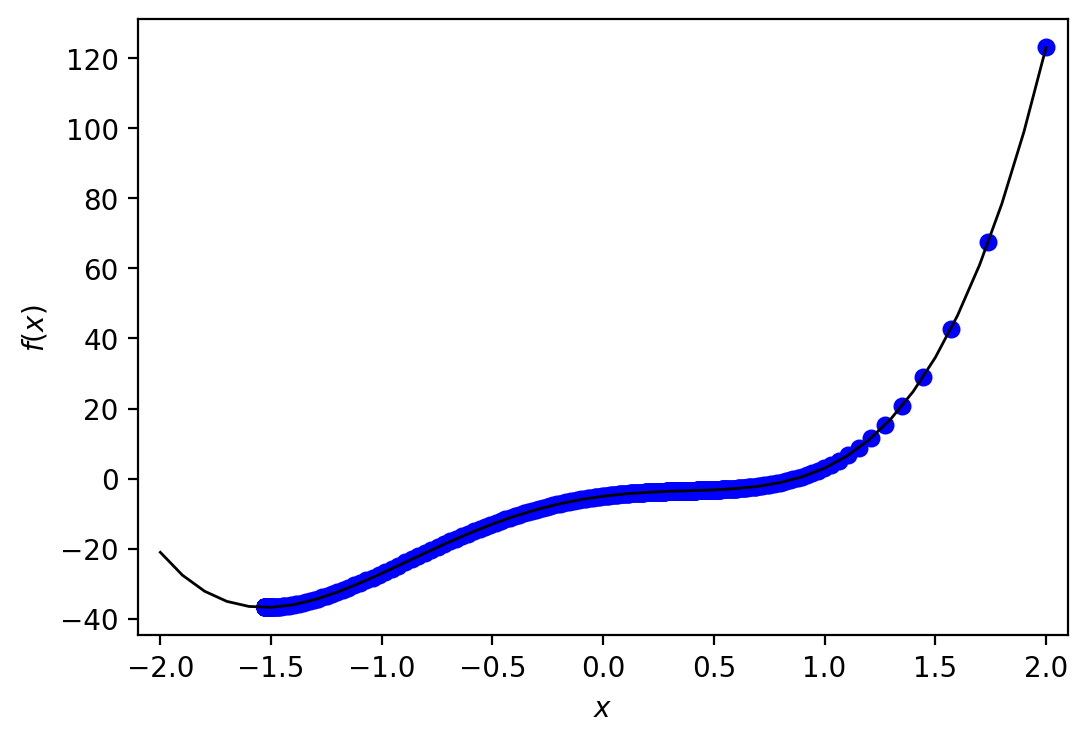

In [ ]:
# 定義四次多項式的係數
coefs = [-5, 8, -14, 7, 7]  # 對應 -5 + 8x - 14x² + 7x³ + 7x⁴
n_iteration = 400           # 迭代 400 次
learning_rate = 0.001       # 學習率設定為 0.001

# 建立梯度下降物件
gradient = GradientDescent(coefs, n_iteration, learning_rate)

# 從 x=2 開始執行梯度下降
x, y, x_history, y_history = gradient.gradient_descent(x0=2)

# 繪製優化過程
gradient.plot_gd_history(x_min=-2, x_max=2)

### 目標函數
$f(x) = 7x^4 + 7x^3 - 14x^2 + 8x - 5$

### 關鍵參數設定
1. 係數陣列：[-5, 8, -14, 7, 7]
- 常數項：-5
- x 項：8
- x² 項：-14
- x³ 項：7
- x⁴ 項：7
  
2. 優化參數：
- 迭代次數：400（比簡單函數需要更多次）
- 學習率：0.001（較小，因為四次函數梯度變化較大）
- 起始點：x=2
  
3. 視覺化範圍：x ∈ [-2, 2]

### 執行結果
- x：最終的最佳 x 值
- y：對應的函數值
- x_history, y_history：記錄整個優化過程
這個例子展示了梯度下降如何處理比二次函數更複雜的優化問題，學習率需要調整得更小以確保穩定收斂。

MovieWriter ffmpeg unavailable; using Pillow instead.


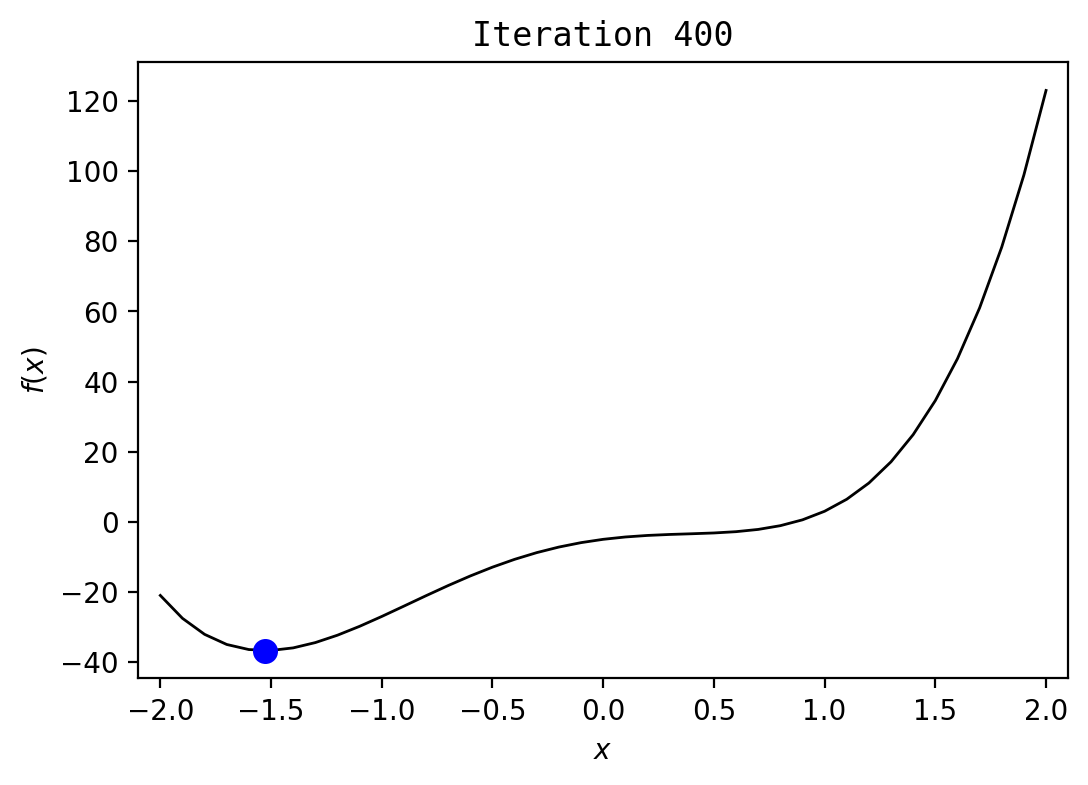

In [9]:
gradient.save_gif(x_min=-2, x_max=2, filename='./gradient_decsend.gif')

## 加上動量（Momentum）

In [10]:
class GradientDescentWithMomentum():
    def __init__(self, coefs, n_iteration, learning_rate, beta):
        self.n_iteration = n_iteration
        self.lr = learning_rate
        self.beta = beta
        
        self.w0 = coefs[0]
        self.w1 = coefs[1]
        self.w2 = coefs[2]
        self.w3 = coefs[3]
        self.w4 = coefs[4]
        
    def loss_function(self, x):
        return self.w4 * x ** 4 + self.w3 * x ** 3 + self.w2 * x ** 2 + self.w1 * x + self.w0

    def derivative(self, x):
        return 4 * self.w4 * x ** 3 + 3 * self.w3 * x ** 2 + 2 * self.w2 * x + self.w1
    
    def gradient_descent(self, x0):
        x = x0  
        x_m = x0  
        y = self.loss_function(x)
        y_m = self.loss_function(x_m)
        momentum = self.lr * self.derivative(x_m)
        
        # without momentum
        self.x_history = [x]
        self.y_history = [y]
        
        # with momentum
        self.x_m_history = [x_m]
        self.y_m_history = [y_m]
        
        for i_iter in range(self.n_iteration):
            # Without momentum
            x = x - self.lr * self.derivative(x)
            y = self.loss_function(x)
            
            self.x_history.append(x)
            self.y_history.append(y)
            
            # With momentum
            momentum = self.beta * momentum - self.lr * self.derivative(x_m)  # 更新 momentum
            x_m = x_m + momentum  # 更新 x
            y_m = self.loss_function(x_m)
                
            self.x_m_history.append(x_m)
            self.y_m_history.append(y_m)
            
        return x, y, x_m, y_m, self.x_history, self.y_history, self.x_m_history, self.y_m_history
    
    def plot_gd_history(self, x_min, x_max):
        xx = np.arange(x_min, x_max + 0.1, 0.1)
        yy = self.loss_function(xx)
        
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.plot(xx, yy, color='k', ls='-', lw=1)
        ax.scatter(self.x_history, self.y_history, marker='o', s=100, c='b', label=f'Without momentum')
        ax.scatter(self.x_m_history, self.y_m_history, marker='.', s=100, c='r', label=r'With momentum, $\beta$ = ' + f'{self.beta}')
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$f(x)$')
        ax.set_xlim([x_min - 0.1, x_max + 0.1])
        
        ax.legend(fancybox=False)
        
    def save_gif(self, x_min, x_max, filename):
        xx = np.arange(x_min, x_max + 0.1, 0.1)
        yy = self.loss_function(xx)
        
        fig = plt.figure(figsize = (6, 4))
        ax = fig.gca()
        
        line, = ax.plot(xx, yy, color='k', ls='-', lw=1)
        dot, = ax.plot([], [], marker='o', markersize=8, c='b', label=f'Without momentum', linestyle='')
        dot_m, = ax.plot([], [], marker='o', markersize=8, c='darkred', label=r'With momentum, $\beta$ = ' + f'{self.beta}', linestyle='')

        plt.xlabel(r'$x$')
        plt.ylabel(r'$f(x)$')
        ax.set_xlim([x_min - 0.1, x_max + 0.1])
        ax.legend(fancybox=False)
        # ax.set_ylim([0, 36])

        def update(idx):
            dot.set_data([self.x_history[idx]], [self.y_history[idx]])
            dot_m.set_data([self.x_m_history[idx]], [self.y_m_history[idx]])
            plt.title(f'Iteration {idx:>3d}', fontname = 'monospace')
            return dot, dot_m

        def init():
            line.set_data(xx, yy)
            return line

        anim = animation.FuncAnimation(
            fig, 
            func=update, 
            frames=len(self.x_history), 
            init_func=init, 
            interval=100, 
            repeat=True
        )

        anim.save(filename, dpi=200)

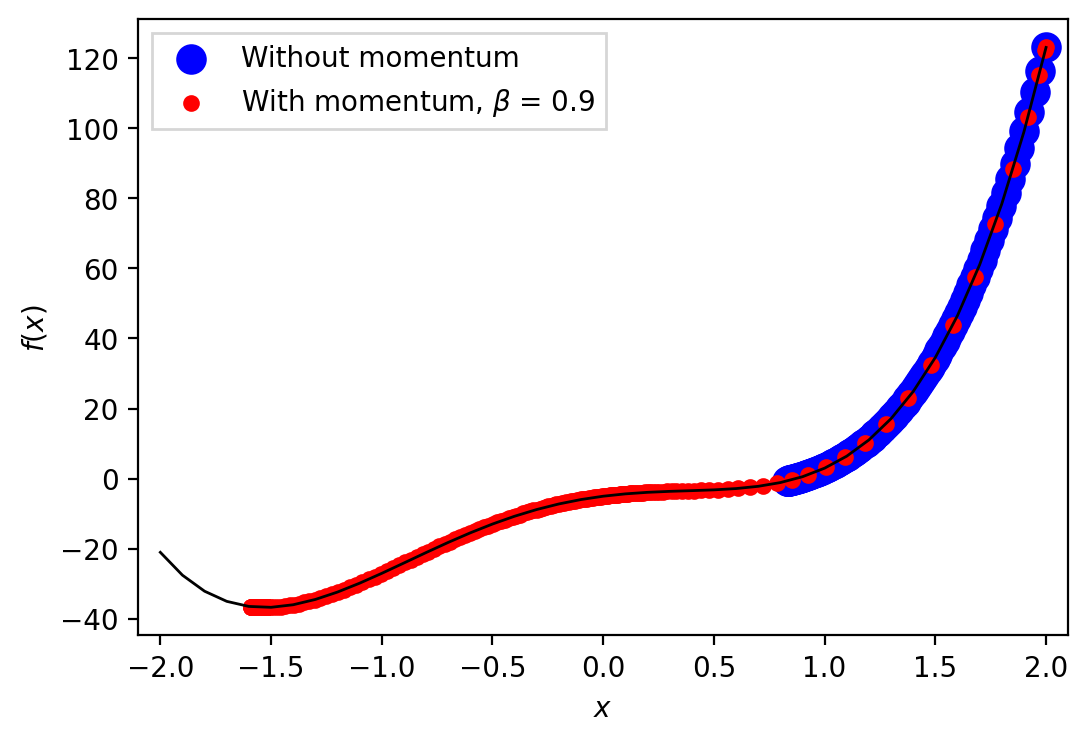

In [11]:
coefs = [-5, 8, -14, 7, 7]

n_iteration = 200
learning_rate = 0.0001
beta = 0.9

gradient = GradientDescentWithMomentum(coefs, n_iteration, learning_rate, beta)

best, score, best_m, score_m, xx, yy, xx_m, yy_m = gradient.gradient_descent(x0=2)

gradient.plot_gd_history(x_min=-2, x_max=2)

MovieWriter ffmpeg unavailable; using Pillow instead.


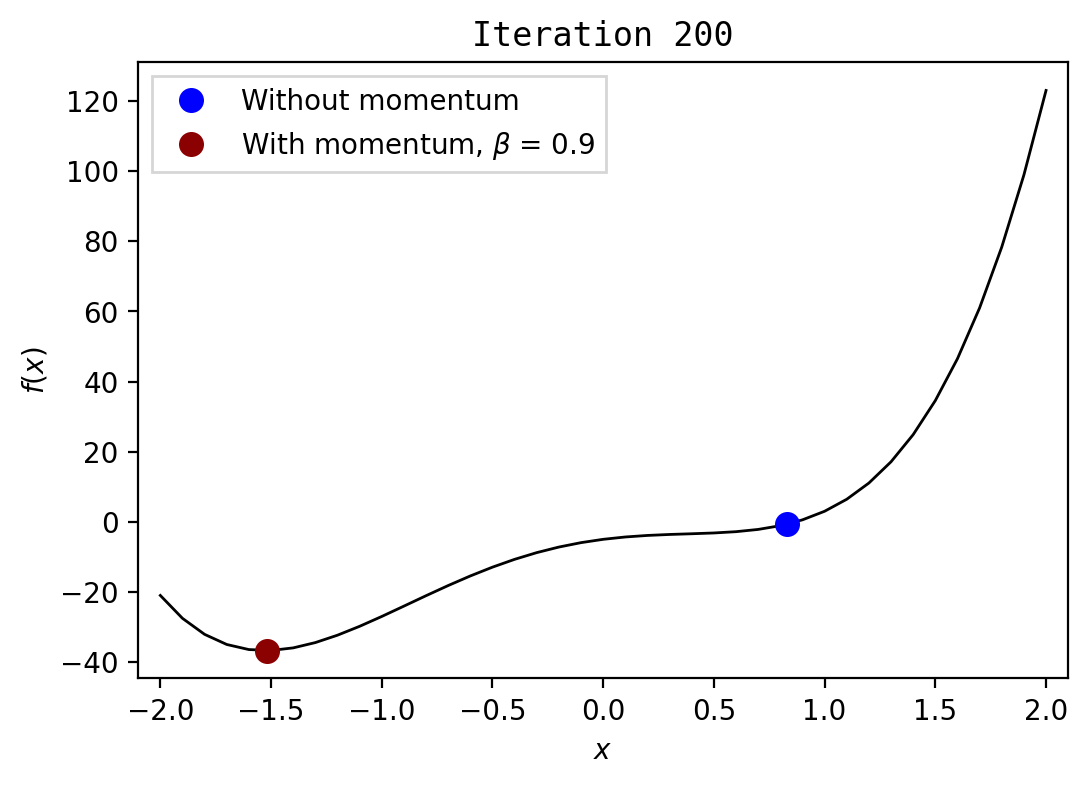

In [12]:
gradient.save_gif(x_min=-2, x_max=2, filename=f'./gradient_decsend_momentum.gif')